In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Original Image

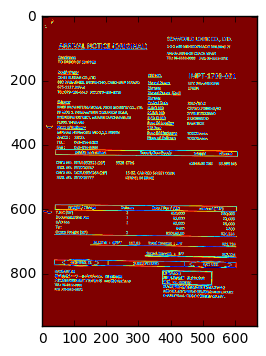

In [2]:
img = cv2.imread("../data/documents/Arrival_Notice.png",0)

plt.imshow(img)

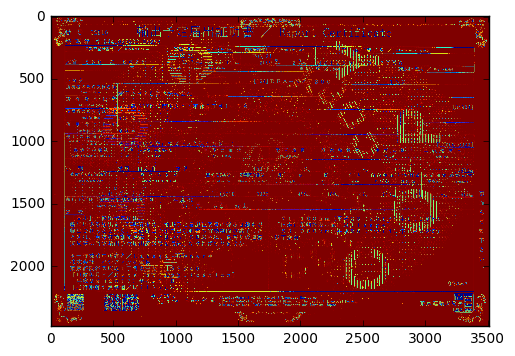

In [3]:
img2 = cv2.imread("../data/documents/car_export.jpg",0)

plt.imshow(img2)

# FAST/Harris Corner Detector

Doesn't perform so well...

True

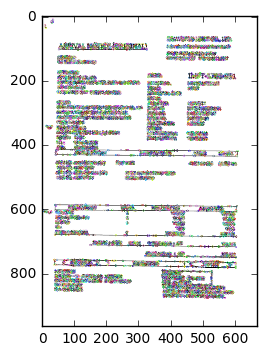

In [4]:
fast = cv2.FastFeatureDetector_create()
kp = fast.detect(img,None)
out = cv2.drawKeypoints(img, kp, img)
plt.imshow(out)
cv2.imwrite("../out.png",out)

True

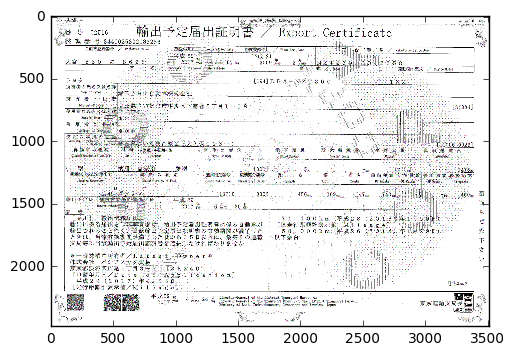

In [5]:
fast = cv2.FastFeatureDetector_create(threshold=200)
kp = fast.detect(img2,None)
out = cv2.drawKeypoints(img2, kp, img2)
plt.imshow(out)
cv2.imwrite("../out.png",out)

(<matplotlib.axes._subplots.AxesSubplot at 0x110d3d910>,
 <matplotlib.image.AxesImage at 0x10e5ef050>)

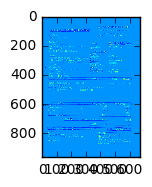

In [6]:
corners = cv2.cornerHarris(img,2,3,0.04)
plt.subplot(2,1,1), plt.imshow(corners ,cmap = 'jet')

(<matplotlib.axes._subplots.AxesSubplot at 0x1152a0810>,
 <matplotlib.image.AxesImage at 0x10e3d1590>)

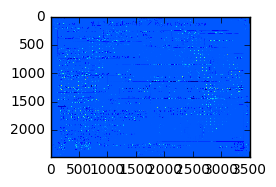

In [8]:
corners = cv2.cornerHarris(img2,2,3,0.04)
plt.subplot(2,1,1), plt.imshow(corners ,cmap = 'jet')

True

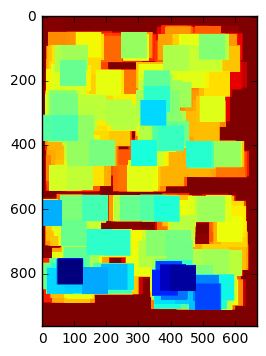

In [33]:
kernel = np.ones((5,5),np.uint8)
img = cv2.erode(img,kernel,iterations = 1)
plt.imshow(img)
cv2.imwrite("img_erode.jpg",img)

True

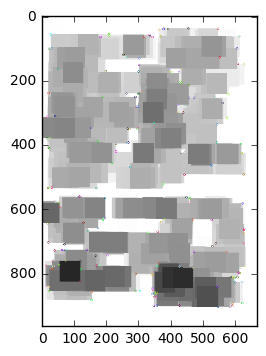

In [30]:

fast = cv2.FastFeatureDetector_create()
kp = fast.detect(img,None)
out = cv2.drawKeypoints(img, kp, img)
plt.imshow(out)
cv2.imwrite("../out.png",out)


# Form's straight lines could be nice as the key. But, straight line detect algorithm is not stable...
Hough, the most trustful algorithm to detect straight lines, is a great algorithm. However, if I want to use the algorithm for production, there are several problems to work around such as counting one line as multiple lines, sensitive to noises, cannot detect 1px width diagonal line...
I have tested it in another purpose, but it ended up with lots of magic numbers.

# cv2.matchTemplate is the best answer
This is used for anchoring the document's position. 
But, we can use the function for calculating the similarity of the anchor photo and each document, too. By default, it returns the correlation too.

* One thing we need to be careful is that we must register unique anchor photo. If the similarity is more than 60%, we should avoid from registering it and we should pick another place for the anchor photo. *

## anchor photo
<img src="../data/documents_anchor/crop.png">

## matching score
{'Commercial_Invoice.png': 0.22420096397399902, 'House_BL.png': 0.2587311863899231, 'car_export.jpg': 0.4441049098968506, 'Arrival_Notice.png': 0.9993836283683777}

Arrival_Notice.png
<img src="../data/documents/Arrival_Notice.png" width="200">
car_export.jpg
<img src="../data/documents/car_export.jpg" width="200">
Commercial_Invoice.png
<img src="../data/documents/Commercial_Invoice.png" width="200">
House_BL.png
<img src="../data/documents/House_BL.png" width="200">